## Nearest neighbor classifier for Non-linearly Seperable Classes


In [2]:
import numpy as np
from sklearn.metrics import accuracy_score

# Load data from txt files (train, val, test)
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # Feature columns (first two columns)
    y = data[:, 2].astype(int)  # Class labels (third column)
    return X, y

# Nearest Neighbor classifier function
def nearest_neighbor_classifier(train_X, train_y, test_X):
    predictions = []
    for test_point in test_X:
        # Calculate distances from test point to all train points
        distances = np.linalg.norm(train_X - test_point, axis=1)
        # Find the nearest neighbor's index
        nearest_neighbor_index = np.argmin(distances)
        # Predict the label of the nearest neighbor
        predicted_label = train_y[nearest_neighbor_index]
        predictions.append(predicted_label)
    return np.array(predictions)

# Load train, validation, and test data
train_X, train_y = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt')
val_X, val_y = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_val.txt")
test_X, test_y = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt")

# Validate the model on the validation set
val_predictions = nearest_neighbor_classifier(train_X, train_y, val_X)
val_accuracy = accuracy_score(val_y, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Test the model on the test set
test_predictions = nearest_neighbor_classifier(train_X, train_y, test_X)
test_accuracy = accuracy_score(test_y, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")


Validation Accuracy: 1.00
Test Accuracy: 1.00


### Plot of the results

##### Decision region plot for all the classes together with the training data superposed 

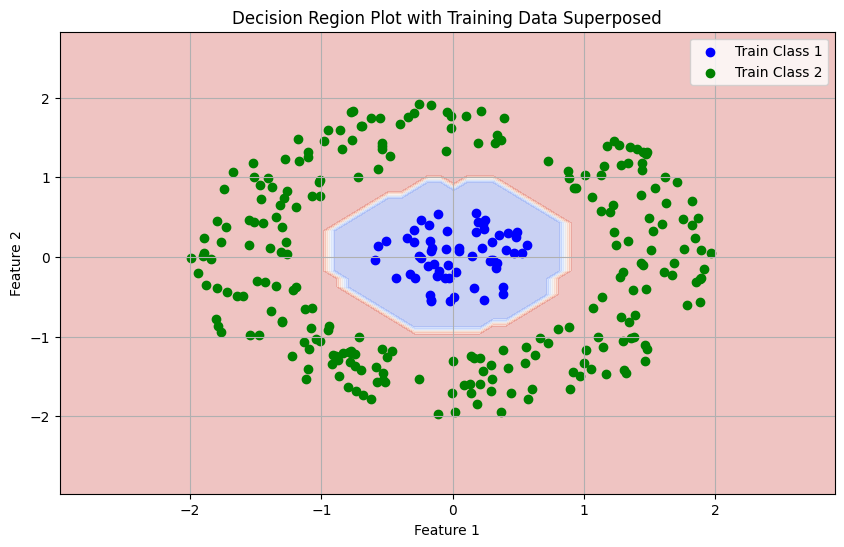

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load data from txt files (train, val, test) assuming space-separated format
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # Feature columns (first two columns)
    y = data[:, 2].astype(int)  # Class labels (third column)
    return X, y

# Load train data
train_X, train_y = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt")

# Create a k-NN classifier (k=1 for nearest neighbor)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_y)

# Create a mesh grid for the decision region plot
x_min, x_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
y_min, y_max = train_X[:, 1].min() - 1, train_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Superpose the training data points
plt.scatter(train_X[train_y == 1][:, 0], train_X[train_y == 1][:, 1], color='blue', label='Train Class 1', marker='o')
plt.scatter(train_X[train_y == 2][:, 0], train_X[train_y == 2][:, 1], color='green', label='Train Class 2', marker='o')

# Plot settings
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region Plot with Training Data Superposed')
plt.legend()
plt.grid(True)
plt.show()


##### Decision region plot for all the classes together with the testing data and training data superimposed 

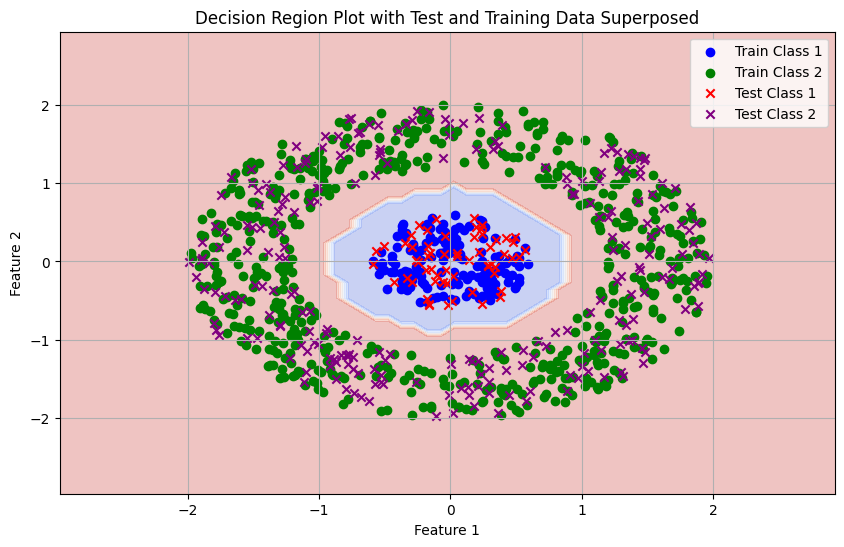

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load data from txt files (train, val, test) assuming space-separated format
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # Feature columns (first two columns)
    y = data[:, 2].astype(int)  # Class labels (third column)
    return X, y

# Load train and test data
train_X, train_y = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt")
test_X, test_y = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt")

# Create a k-NN classifier (k=1 for nearest neighbor)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_y)

# Create a mesh grid for the decision region plot
x_min, x_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
y_min, y_max = train_X[:, 1].min() - 1, train_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Superpose the training data points
plt.scatter(train_X[train_y == 1][:, 0], train_X[train_y == 1][:, 1], color='blue', label='Train Class 1', marker='o')
plt.scatter(train_X[train_y == 2][:, 0], train_X[train_y == 2][:, 1], color='green', label='Train Class 2', marker='o')

# Superpose the test data points
plt.scatter(test_X[test_y == 1][:, 0], test_X[test_y == 1][:, 1], color='red', label='Test Class 1', marker='x')
plt.scatter(test_X[test_y == 2][:, 0], test_X[test_y == 2][:, 1], color='purple', label='Test Class 2', marker='x')

# Plot settings
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region Plot with Test and Training Data Superimposed')
plt.legend()
plt.grid(True)
plt.show()


##### Decision region plot for all the classes together with the test data superposed 

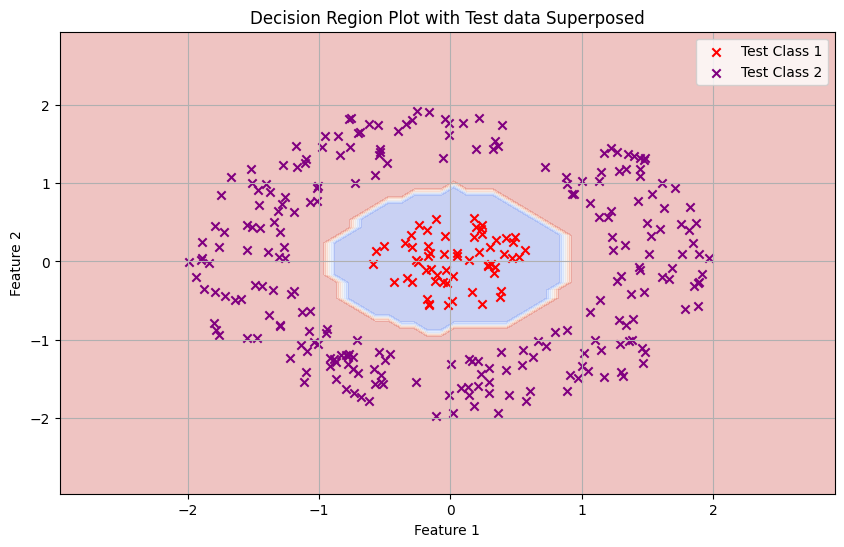

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Load data from txt files (train, val, test) assuming space-separated format
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # Feature columns (first two columns)
    y = data[:, 2].astype(int)  # Class labels (third column)
    return X, y

# Load train and test data
train_X, train_y = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt")
test_X, test_y = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt")

# Create a k-NN classifier (k=1 for nearest neighbor)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_y)

# Create a mesh grid for the decision region plot
x_min, x_max = train_X[:, 0].min() - 1, train_X[:, 0].max() + 1
y_min, y_max = train_X[:, 1].min() - 1, train_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)


# Superpose the test data points
plt.scatter(test_X[test_y == 1][:, 0], test_X[test_y == 1][:, 1], color='red', label='Test Class 1', marker='x')
plt.scatter(test_X[test_y == 2][:, 0], test_X[test_y == 2][:, 1], color='purple', label='Test Class 2', marker='x')

# Plot settings
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region Plot with Test data Superposed')
plt.legend()
plt.grid(True)
plt.show()


### Evaluation metrics

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Load data from txt files (train, val, test) assuming space-separated format
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # Feature columns (first two columns)
    y = data[:, 2].astype(int)  # Class labels (third column)
    return X, y

# Load train and test data
train_X, train_y = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt")
test_X, test_y = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt")

# Create a k-NN classifier (k=1 for nearest neighbor)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_y)

# Predict on test data
test_pred = knn.predict(test_X)

# Calculate metrics for each class
accuracy = accuracy_score(test_y, test_pred)
precision_class_1 = precision_score(test_y, test_pred, pos_label=1)
precision_class_2 = precision_score(test_y, test_pred, pos_label=2)
recall_class_1 = recall_score(test_y, test_pred, pos_label=1)
recall_class_2 = recall_score(test_y, test_pred, pos_label=2)
f1_class_1 = f1_score(test_y, test_pred, pos_label=1)
f1_class_2 = f1_score(test_y, test_pred, pos_label=2)

# Calculate mean metrics
mean_precision = (precision_class_1 + precision_class_2) / 2
mean_recall = (recall_class_1 + recall_class_2) / 2
mean_f1_score = (f1_class_1 + f1_class_2) / 2

# Create a DataFrame for the results
metrics_table = pd.DataFrame({
    "Metric": ["Accuracy", "Precision (Class 1)", "Precision (Class 2)", "Mean Precision",
               "Recall (Class 1)", "Recall (Class 2)", "Mean Recall", 
               "F-measure (Class 1)", "F-measure (Class 2)", "Mean F-measure"],
    "Score": [accuracy, precision_class_1, precision_class_2, mean_precision,
              recall_class_1, recall_class_2, mean_recall,
              f1_class_1, f1_class_2, mean_f1_score]
})

# Display the table
print(metrics_table)


                Metric  Score
0             Accuracy    1.0
1  Precision (Class 1)    1.0
2  Precision (Class 2)    1.0
3       Mean Precision    1.0
4     Recall (Class 1)    1.0
5     Recall (Class 2)    1.0
6          Mean Recall    1.0
7  F-measure (Class 1)    1.0
8  F-measure (Class 2)    1.0
9       Mean F-measure    1.0


#### Confusion matrix based on the performance for test data

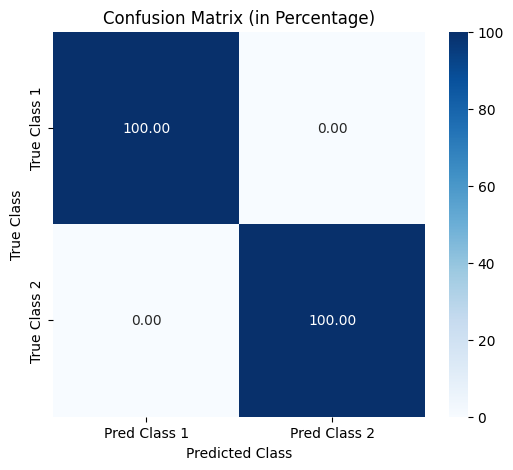

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Load data from txt files (train, val, test) assuming space-separated format
def load_data(file_path):
    data = np.loadtxt(file_path)
    X = data[:, :2]  # Feature columns (first two columns)
    y = data[:, 2].astype(int)  # Class labels (third column)
    return X, y

# Load train and test data
train_X, train_y = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_train.txt")
test_X, test_y = load_data(r"C:\Users\raksh\IML-project-dec-2024\classification_datasets\nonLinearlySeparable\combined_dataset_test.txt")

# Create a k-NN classifier (k=1 for nearest neighbor)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X, train_y)

# Predict on test data
test_pred = knn.predict(test_X)

# Generate confusion matrix
cm = confusion_matrix(test_y, test_pred)

# Normalize the confusion matrix by the total number of test samples
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=["Pred Class 1", "Pred Class 2"], yticklabels=["True Class 1", "True Class 2"])
plt.title('Confusion Matrix (in Percentage)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
